### **Hyphothesis testing**
- used to prove or disprove phenomenon

- **Ho : Null hyphothesis**
- **Ha : Alternate hyphothesis**

**Importimg required libraries**

In [78]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
dataset = sbn.load_dataset('titanic')

dataset.head().select_dtypes(exclude=['O',bool])

,survived,pclass,age,sibsp,parch,fare,class,deck
0,0,3,22.0,1,0,7.2500,Third,NaN
1,1,1,38.0,1,0,71.2833,First,C
2,1,3,26.0,0,0,7.9250,Third,NaN
3,1,1,35.0,1,0,53.1000,First,C
4,0,3,35.0,0,0,8.0500,Third,NaN


Ho :  

In [6]:
dataset.sex.unique()

array(['male', 'female'], dtype=object)

In [16]:
male_data = dataset[dataset.sex == 'male']

male_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


In [17]:
male_data.age.isnull().sum()

124

In [ ]:
male_data.age.fillna(male_data.age.mean(),inplace=True)

In [22]:
male_data.age.isnull().sum()

0

### **Ho : Maximum Age of Males in Titanic is 30**
### **Ha : Maximum Age of Males in Titanic is NOT 30**

In [43]:
hypo_mean = 30

 ## **One Sample t-test**



We have to prove that age of males in titanic is 30, If we fail to prove this assumption then **Alternate hyphothesis** will be true, which is that age of males in titanic is NOT 30

**First check data distribution**

In [24]:
print(f"Skewness of Male's age is: {stats.skew(male_data.age)}")
print(f"Kurtosis of Male's age is: {stats.kurtosis(male_data.age)}")

Skewness of Male's age is: 0.534664568449746
Kurtosis of Male's age is: 1.2529075417896056


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


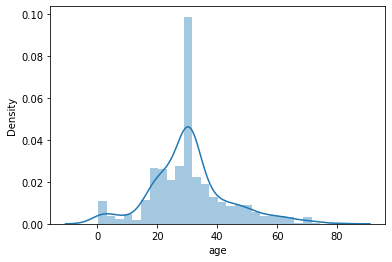

In [25]:
sbn.distplot(male_data.age)

plt.show()

**+ve Kurtosis**



---







In [32]:
age_transform = male_data['age'].transform([np.sqrt,np.exp,np.log,np.reciprocal])

print(age_transform)

         sqrt           exp       log  reciprocal
0    4.690416  3.584913e+09  3.091042    0.045455
4    5.916080  1.586013e+15  3.555348    0.028571
5    5.543162  2.210101e+13  3.425130    0.032545
6    7.348469  2.830753e+23  3.988984    0.018519
7    1.414214  7.389056e+00  0.693147    0.500000
..        ...           ...       ...         ...
883  5.291503  1.446257e+12  3.332205    0.035714
884  5.000000  7.200490e+10  3.218876    0.040000
886  5.196152  5.320482e+11  3.295837    0.037037
889  5.099020  1.957296e+11  3.258097    0.038462
890  5.656854  7.896296e+13  3.465736    0.031250

[577 rows x 4 columns]


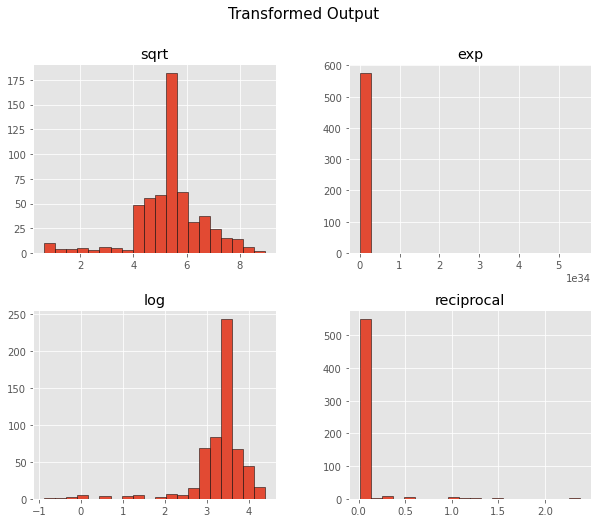

In [41]:
age_transform.hist(bins=20, layout=(2,2), edgecolor='k', figsize=(10,8))

plt.suptitle("Transformed Output", size=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


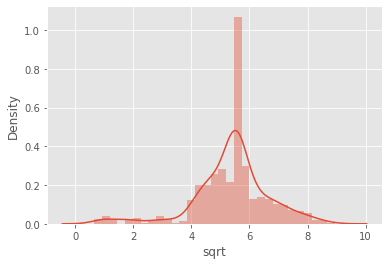

In [37]:
sbn.distplot(age_transform.sqrt)

In [38]:
stats.skew(age_transform.sqrt)

-0.8316840319010874

In [40]:
stats.kurtosis(age_transform.sqrt)

2.466070429492083



---







/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


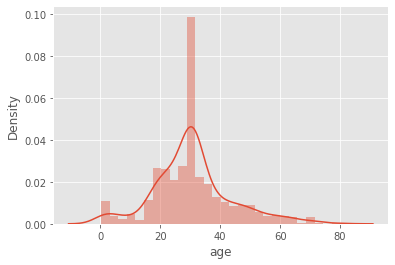

In [42]:
sbn.distplot(male_data.age)

plt.show()

In [44]:
stats.ttest_1samp(male_data.age , hypo_mean)

Ttest_1sampResult(statistic=1.3423913685573845, pvalue=0.17999795671256785)



---


- **If pvalue < 5 %, We REJECT Null hyphothesis (Ho)**


---

OR

---
- **If  T(statistic) > Tc(T critical), We REJECT Null hyphothesis (Ho)**



---







## **Table for T critical**
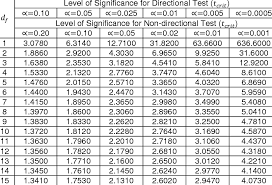

In [47]:
stats.ttest_1samp(male_data.age , hypo_mean)

Ttest_1sampResult(statistic=1.3423913685573845, pvalue=0.17999795671256785)

- **From above t-test, pvalue is > 5**


---


 ALSO


---

- **T < Tc, So we FAIL to REJECT Null Hypothesis, ACCEPT Null Hypothesis (Ho) and REJECT Alternate Hypothesis (Ha)**



---

#### **Ho : Maximum Age of Males in Titanic is 30**
#### **Ha : Maximum Age of Males in Titanic is NOT 30**

In [ ]:
# ------------------------------



---







## **Two Sample Independent t-test**

- **Ho** :  Marriage age of Males in Pakistan and USA are same
- **Ha** :  Marriage age of Males in Pakistan and USA are NOT same

In [48]:
marriage_age_pk = [28,30,31,32,29,27,31,35,32,33,30,29,34]
marriage_age_usa = [38,40,36,34,39,37,31,35,32,36,37,29,36]

In [49]:
print(f"Skewness of marriage age in Pakistan is: {stats.skew(marriage_age_pk)} ")
print(f"Skewness of marriage age in USA is: {stats.skew(marriage_age_usa)} ")
print(f"Kurtosis of marriage age in Pakistan is: {stats.kurtosis(marriage_age_pk)} ")
print(f"Kurtosis of marriage age in Pakistan is: {stats.kurtosis(marriage_age_pk)} ")

Skewness of marriage age in Pakistan is: 0.1514624556753041 
Skewness of marriage age in USA is: -0.5776478087974849 
Kurtosis of marriage age in Pakistan is: -0.7996506315506586 
Kurtosis of marriage age in Pakistan is: -0.7996506315506586 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


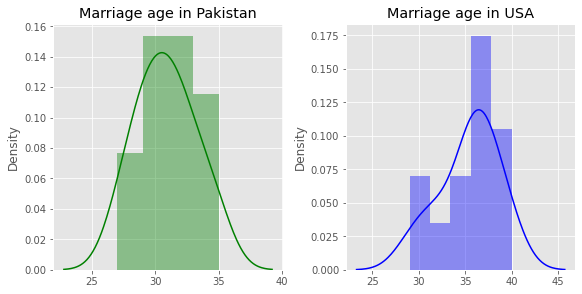

In [76]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sbn.distplot(marriage_age_pk, color='g')
plt.title("Marriage age in Pakistan")

plt.subplot(122)
sbn.distplot(marriage_age_usa, color='b')
plt.title("Marriage age in USA")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


plt.show()

In [66]:
stats.ttest_ind(marriage_age_pk , marriage_age_usa)

Ttest_indResult(statistic=-4.147804643518156, pvalue=0.00036245005684914345)

As pvalue < 5% So We REJECT Null hyphothesis(Ho) and ACCEPT Alternate Hyphothesis(Ha)


---
- **Ho** :  Marriage age of Males in Pakistan and USA are same
- **Ha** :  Marriage age of Males in Pakistan and USA are NOT same




---







## **Two Sample Relational T-Test**

According to research, **Sleep before exam is necessary to achieve good marks**. So we conduct research about this statement. We conduct test of some students before sleep after after sleep based on data we have to **APPROVE** or **DISAPPROVE**  this assumption.

So here
- **Ho :** Marks **before sleep** and **after sleep** is same
- **Ha :** Marks **before sleep** and **after sleep** is **NOT** same

In [101]:
test_before_sleep = pd.DataFrame({"Student Name":["A",'B','C','D','E','F','G','H',"I","J",'K'],
                             "Test Marks":[45,56,78,55,82,57,79,50,56,57,66],
                             "Total Marks": 100
                             })

test_before_sleep.sample(frac=1).head()

,Student Name,Test Marks,Total Marks
9,J,57,100
5,F,57,100
10,K,66,100
1,B,56,100
3,D,55,100


In [102]:
test_after_sleep = pd.DataFrame({"Student Name":["A",'B','C','D','E','F','G','H',"I","J",'K'],
                             "Test Marks":[50,68,80,57,85,70,82,80,66,63,70],
                             "Total Marks": 100
                             })
[45,56,78,55,82,57,79,50,56,57,66]
test_after_sleep.sample(frac=1).head()

,Student Name,Test Marks,Total Marks
9,J,63,100
5,F,70,100
10,K,70,100
3,D,57,100
2,C,80,100


In [103]:
print(f"Skewness of student's marks before sleep: {stats.skew(test_before_sleep['Test Marks'])}")
print(f"Skewness of student's marks after sleep: {stats.skew(test_after_sleep['Test Marks'])}")

print(f"Kurtosis of student's marks before sleep: {stats.kurtosis(test_before_sleep['Test Marks'])}")
print(f"Kurtosis of student's marks after sleep: {stats.kurtosis(test_before_sleep['Test Marks'])}")

Skewness of student's marks before sleep: 0.5268465212013543
Skewness of student's marks after sleep: -0.30360448175974125
Kurtosis of student's marks before sleep: -1.0985962369099564
Kurtosis of student's marks after sleep: -1.0985962369099564


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


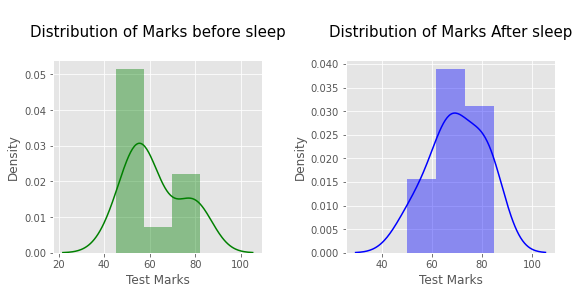

In [104]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sbn.distplot(test_before_sleep['Test Marks'], color='g')
plt.title("\nDistribution of Marks before sleep\n", size=15)

plt.subplot(122)
sbn.distplot(test_after_sleep['Test Marks'], color='b')
plt.title("\nDistribution of Marks After sleep\n", size=15)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


plt.show()

In [99]:
# -------------------------------------

In [106]:
stats.ttest_rel(test_before_sleep['Test Marks'] , test_after_sleep['Test Marks'])

Ttest_relResult(statistic=-3.291606134857343, pvalue=0.008127936672626809)

As pvalue < 5 %, So we **REJECT** Null hyphothesis and **ACCEPT** Alternate hyphothesis


---
- **Ho : Marks before sleep and after sleep is same**
- **Ha : Marks before sleep and after sleep is NOT same**